# Data Cleaning & EDA

This section of the project is to import the data that were collected from reddit Website. 
1. Import all necessary libraries 
2. Import the data 
3. Overview of the data and start cleaning.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.metrics import Precision, Recall
from keras.utils import plot_model

from tensorflow.keras.layers import Dense, LSTM, GRU, RNN, SimpleRNN, Bidirectional, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

## Import Datasets

In [2]:
stock_name = 'AAPL'

In [3]:
df = pd.read_csv('datasets/aapl_stock_20120723_20200128.csv')
df_sent = pd.read_csv('datasets/aapl_sent.csv')

### Verify each datasets

Identify any missing values in a column/feature

In [4]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,77.514999,77.942497,76.220001,77.237503,75.667831,161940000
1,2020-01-24,80.062500,80.832497,79.379997,79.577499,77.960281,146537600


In [5]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1888,2012-07-24,21.692142,21.774286,21.375357,21.461430,18.294107,565132400
1889,2012-07-23,21.228571,21.639286,20.989643,21.565357,18.382696,487975600


In [6]:
df.shape, df_sent.shape

((1890, 7), (2267, 2))

In [7]:
df_sent.tail(2)

,release_date,compound
2265,2012-07-19,0.9978
2266,2012-07-16,0.9463


In [8]:
df_sent.rename(columns={'release_date':'date'}, inplace=True)

In [9]:
df_merge = pd.merge(df_sent,df, left_index=True, right_index=True)
df_merge.head(2)

,date,compound,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-28,0.575671,2020-01-27,77.514999,77.942497,76.220001,77.237503,75.667831,161940000
1,2020-01-27,0.737588,2020-01-24,80.062500,80.832497,79.379997,79.577499,77.960281,146537600


In [10]:
df_merge.tail()

,date,compound,Date,Open,High,Low,Close,Adj Close,Volume
1885,2014-03-06,0.83720,2012-07-27,20.536072,20.922501,20.413929,20.898571,17.814320,403936400
1886,2014-03-05,0.97510,2012-07-26,20.705713,20.728571,20.370001,20.531429,17.501362,406632800
1887,2014-02-27,-0.02580,2012-07-25,20.516430,20.742857,20.357143,20.534643,17.504091,877312800
1888,2014-02-25,0.97820,2012-07-24,21.692142,21.774286,21.375357,21.461430,18.294107,565132400
1889,2014-02-24,0.01185,2012-07-23,21.228571,21.639286,20.989643,21.565357,18.382696,487975600


In [11]:
df_merge[(df_merge['date'] < '2012-09-12')]

,date,compound,Date,Open,High,Low,Close,Adj Close,Volume


In [12]:
neg_sent = df_merge[(df_merge['date'] < '2019-08-24') & (df_merge['date'] > '2019-06-17')]

In [13]:
neg_sent.head()

,date,compound,Date,Open,High,Low,Close,Adj Close,Volume
148,2019-08-23,0.307333,2019-06-25,49.607498,49.814999,48.822498,48.892502,47.574749,84281200
149,2019-08-22,0.970167,2019-06-24,49.634998,50.040001,49.542500,49.645000,48.306973,72881600
150,2019-08-21,0.629357,2019-06-21,49.700001,50.212502,49.537498,49.695000,48.355625,191202400
151,2019-08-20,0.565678,2019-06-20,50.092499,50.152500,49.507500,49.865002,48.521038,86056000
152,2019-08-19,0.795055,2019-06-19,49.919998,49.970001,49.327499,49.467499,48.134258,84496800


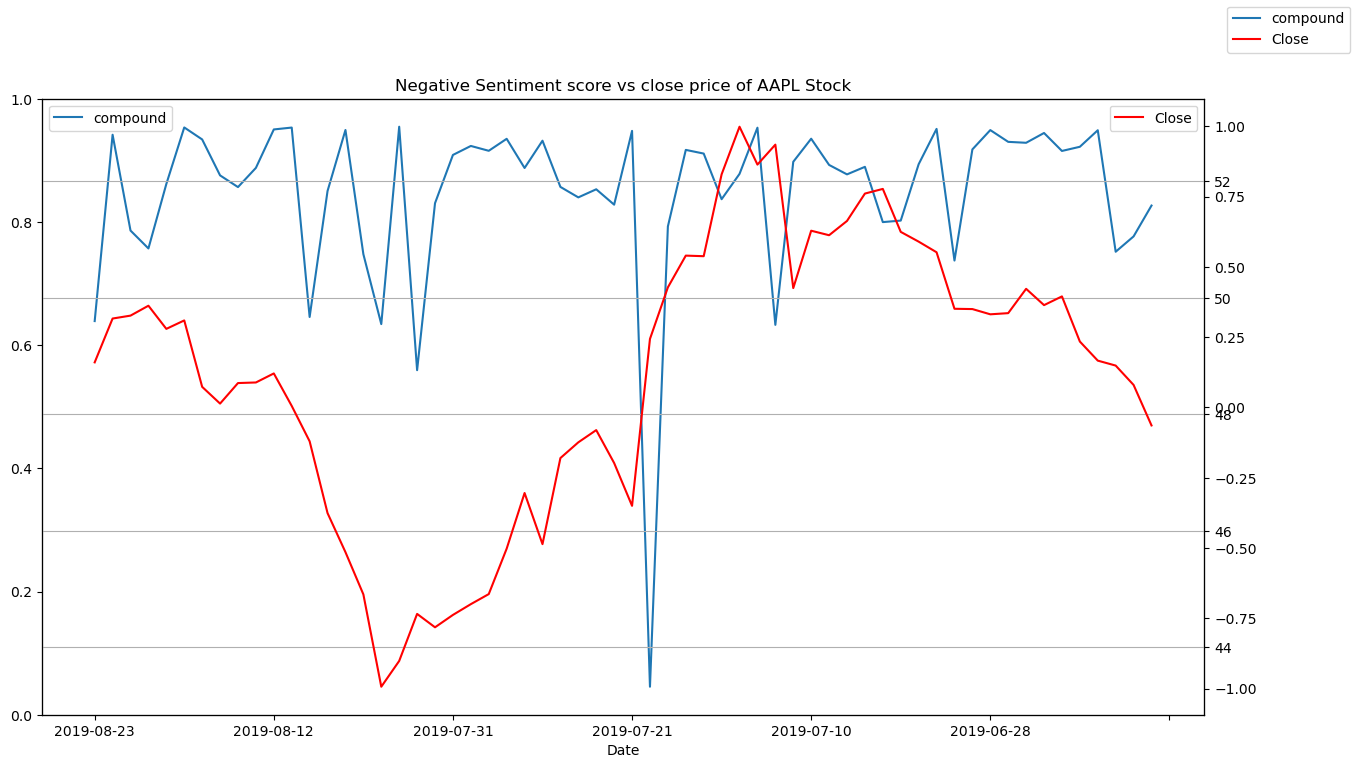

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
ax1 = ax.twinx()
neg_sent.plot(x='date', y='compound', ax=ax1)
ax2 = ax.twinx()
neg_sent.plot(x='date', y='Close', ax=ax2, color="r", grid=True)
ax.set_title(f'Negative Sentiment score vs close price of {stock_name} Stock')
ax.set_xlabel('Date')
ax.figure.legend()
plt.show();

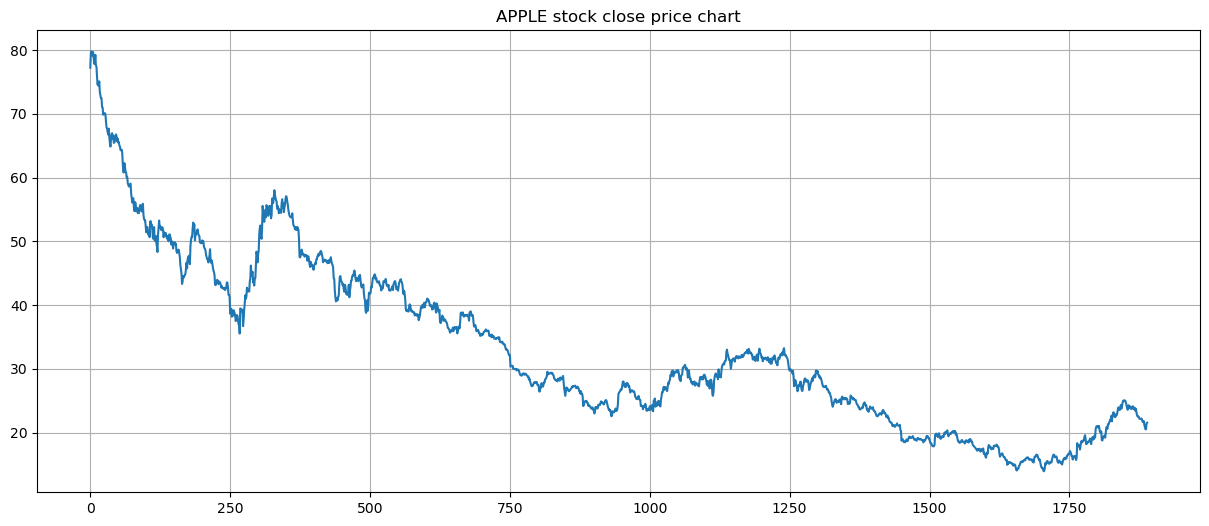

In [15]:
plt.figure(figsize=(15,6))
df_merge['Close'].plot(title='APPLE stock close price chart', label='AAPL', grid=True, )
plt.show();

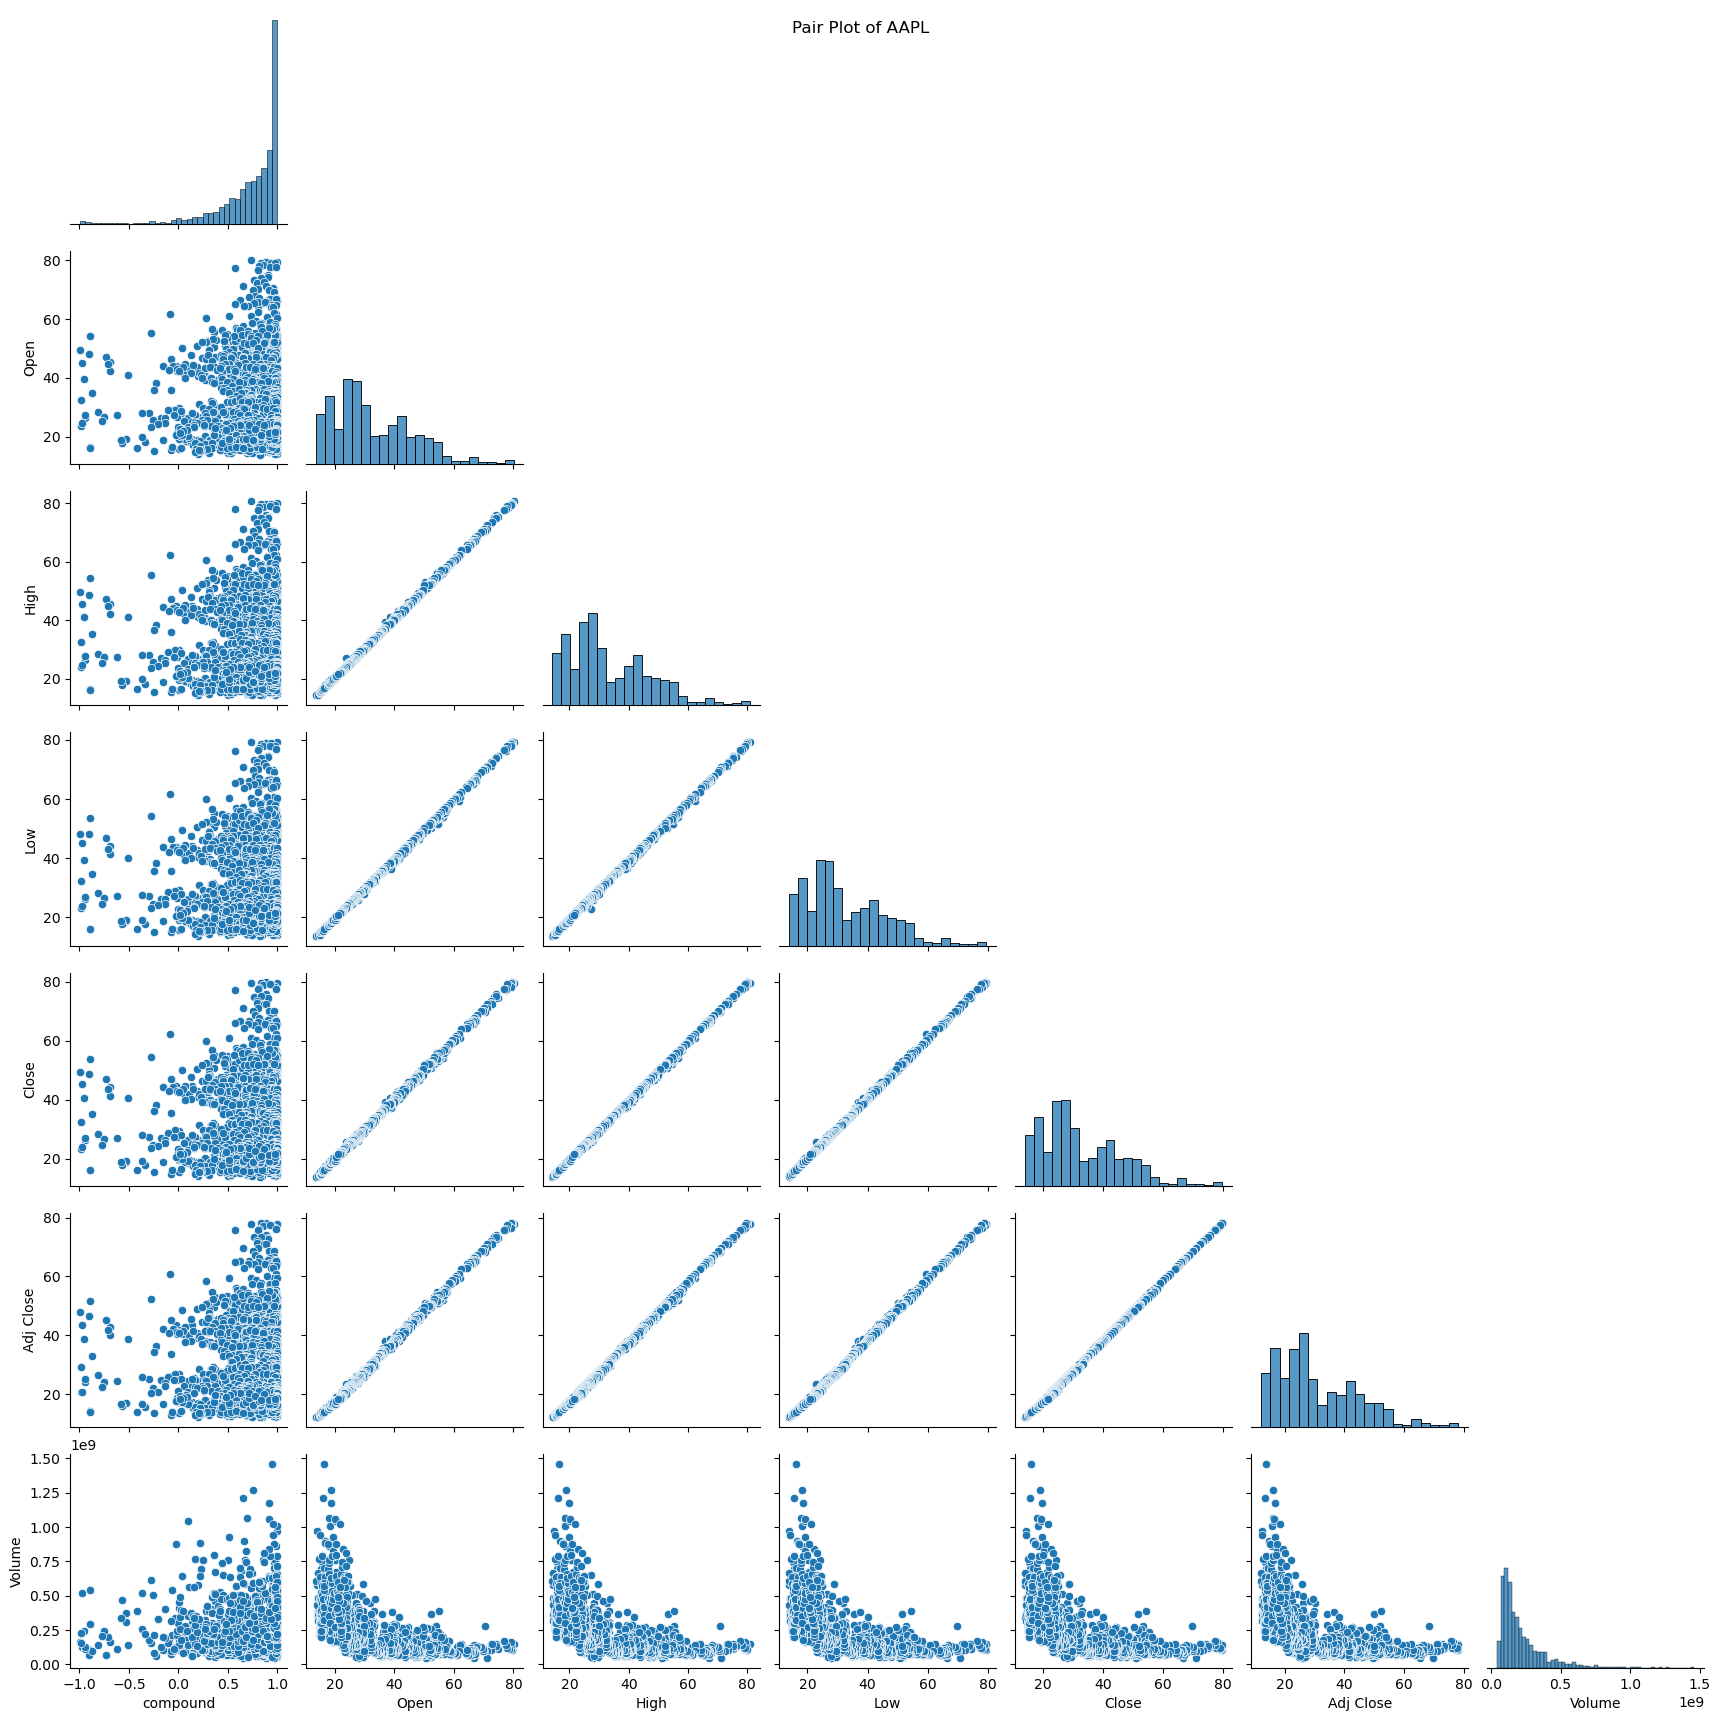

In [16]:
sns.pairplot(df_merge, corner=True)
plt.suptitle(f'Pair Plot of {stock_name}');

In [17]:
df_merge.columns

Index(['date', 'compound', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [18]:
feature = ['compound', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume']

Using correlation function, we can see the insight of the linear relationship between two variables. It is a function of the covariance, which is the measure of how two variables move in relation to each other. A strong correlation means that the two variables have a strong linear relationship, while a weak correlation means that the relationship is not as strong. Correlation can be used to predict the behavior of one variable based on the behavior of the other.

<AxesSubplot: >

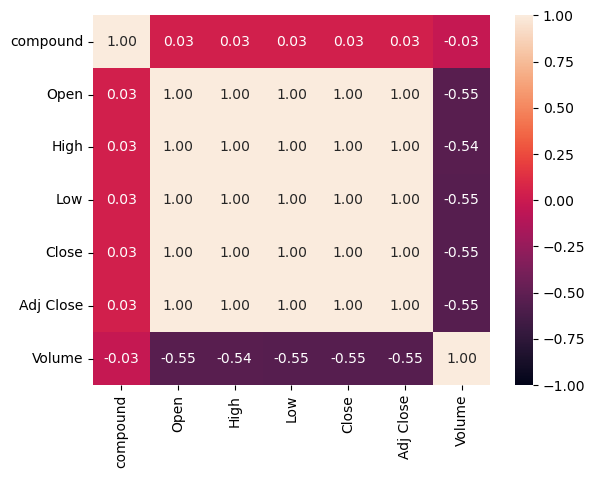

In [19]:
sns.heatmap(df_merge[feature].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

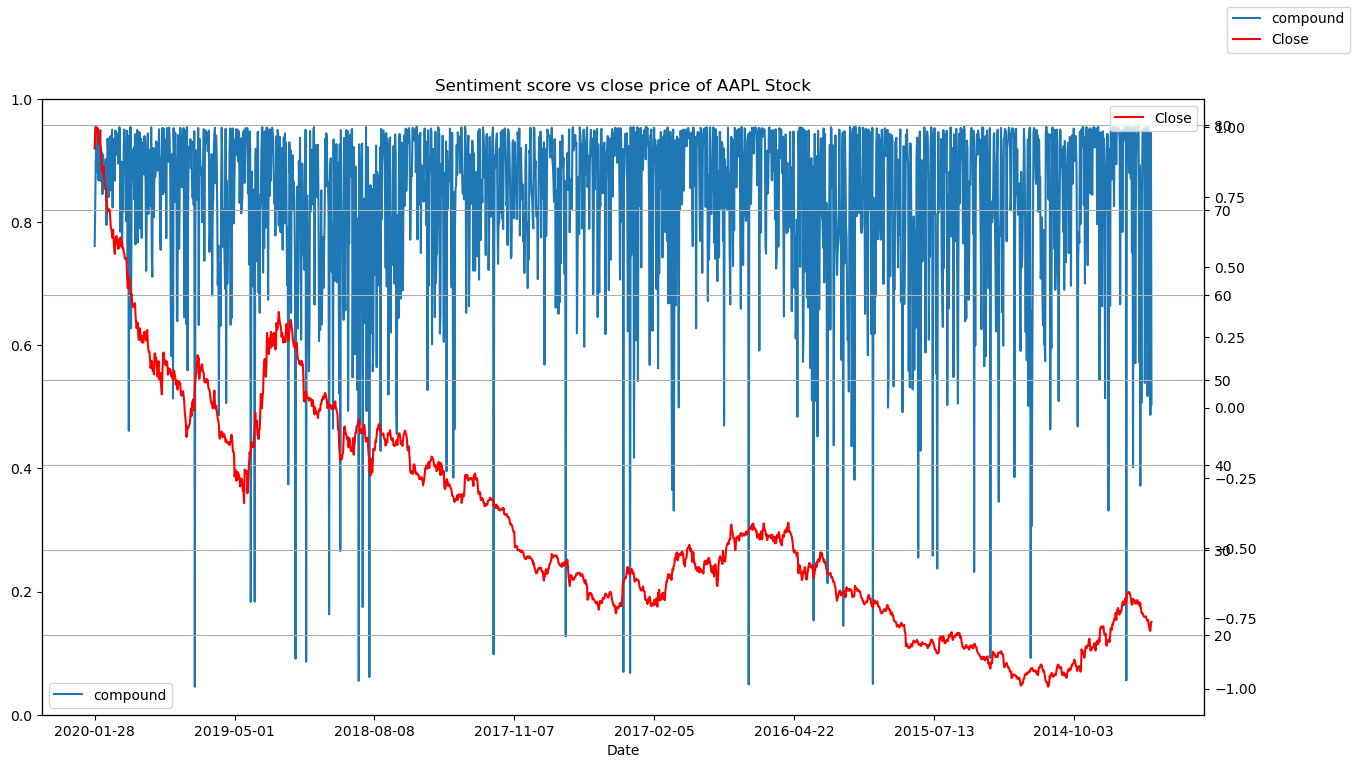

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
ax1 = ax.twinx()
df_merge.plot(x='date', y='compound', ax=ax1)
ax2 = ax.twinx()
df_merge.plot(x='date', y='Close', ax=ax2, color="r", grid=True)
ax.set_title(f'Sentiment score vs close price of {stock_name} Stock')
ax.set_xlabel('Date')
ax.figure.legend()
plt.show();

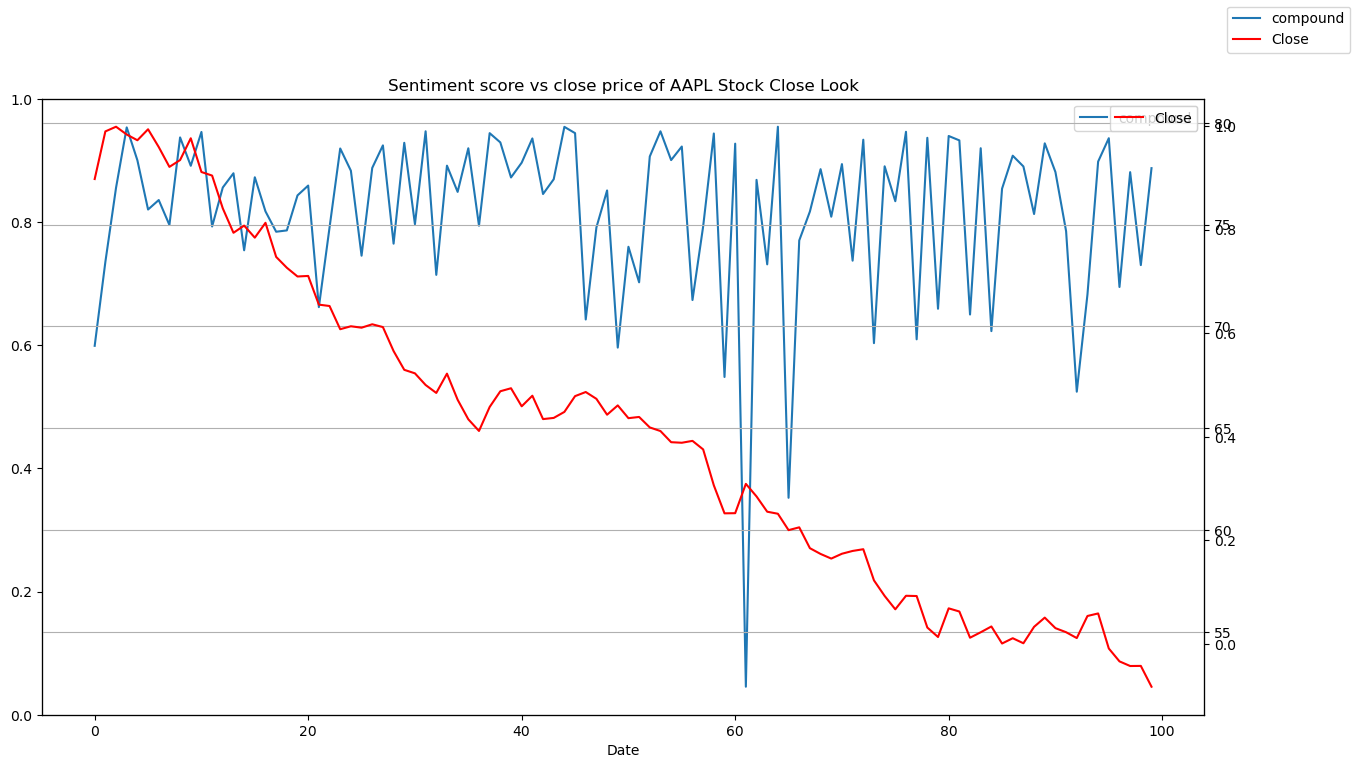

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))
ax1 = ax.twinx()
df_sent[:100].plot(y='compound', ax=ax1)
ax2 = ax.twinx()
df_merge[:100].plot(y='Close', ax=ax2, color="r", grid=True)
ax.set_title(f'Sentiment score vs close price of {stock_name} Stock Close Look')
ax.set_xlabel('Date')
ax.figure.legend()
plt.show();

### Model Selections

#### Linear Regression

In [22]:
X = df_merge.drop(['Close', 'Date','date', 'Adj Close','High','Low'], axis=1)
y = df_merge[['Close']].values

#### Train & Split

In [23]:
X.head()

,compound,Open,Volume
0,0.575671,77.514999,161940000
1,0.737588,80.062500,146537600
2,0.880777,79.480003,104472000
3,0.997300,79.644997,101832400
4,0.933825,79.297501,110843200


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, shuffle=False, random_state=42)

In [25]:
X_train.shape, y_train.shape, X_test.shape

((1323, 3), (1323, 1), (567, 3))

#### Scaling

In [26]:
sc = StandardScaler()

In [27]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [28]:
sc_y = StandardScaler()

In [29]:
y_train_sc = sc_y.fit_transform(y_train.reshape(-1,1))
y_test_sc = sc_y.transform(y_test.reshape(-1,1))

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [32]:
lr.score(X_train_sc, y_train)

0.9984670955398369

In [33]:
lr.score(X_test_sc, y_test)

0.9903167192901842

In [34]:
y_pred = lr.predict(X_test_sc)

In [70]:
rmse = mean_squared_error(y_pred, y_test, squared=False)
rmse

0.31766175018878456

In [132]:
y_test[:5]

array([[25.74749947],
       [25.61750031],
       [24.94000053],
       [24.41749954],
       [24.06500053]])

In [99]:
y_pred[:5]

array([[25.62897801],
       [25.60230001],
       [24.46949041],
       [24.28663658],
       [23.7838852 ]])

In [121]:
lr_df = pd.DataFrame(y_test.reshape(-1), y_pred.reshape(-1))

In [124]:
lr_df.reset_index(inplace=True)

In [126]:
lr_df.rename(columns={'index':'Actual', 0:'Predicted'}, inplace=True)

In [127]:
lr_df.head()

,Actual,Predicted
0,25.628978,25.747499
1,25.602300,25.617500
2,24.469490,24.940001
3,24.286637,24.417500
4,23.783885,24.065001


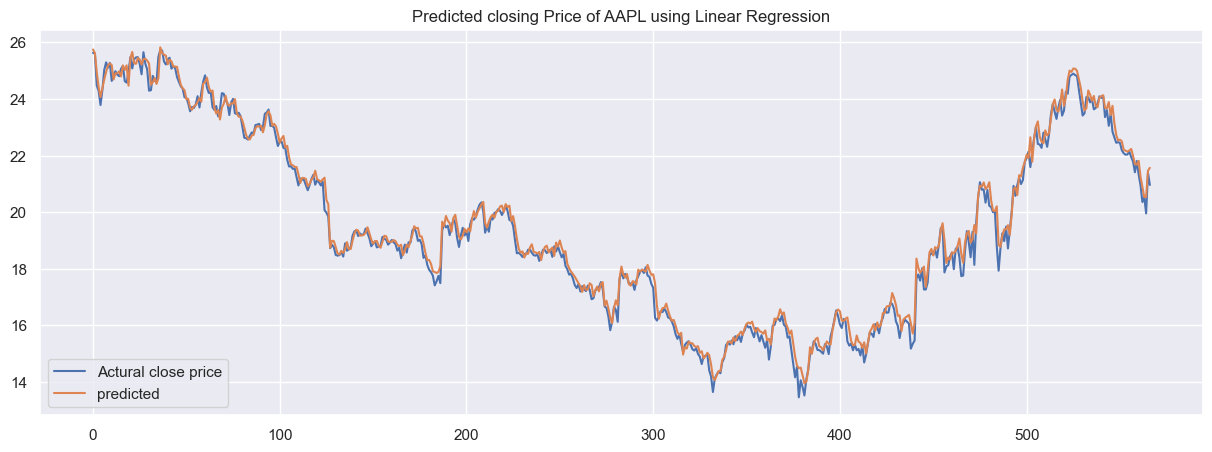

In [129]:
plt.figure(figsize=(15,5))
lr_df['Actual'].plot(label='Actural close price')
lr_df['Predicted'].plot(title=f'Predicted closing Price of {stock_name} using Linear Regression', label='predicted')
plt.legend();

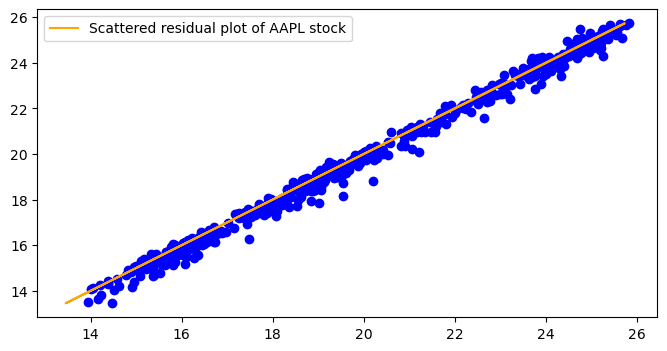

In [36]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, c='b');
plt.plot(y_pred, y_pred, color='orange', label=f'Scattered residual plot of {stock_name} stock')
plt.legend();

In [133]:
def all_sequential(df_train, df_test, symbol, type='gru', length=3, batch=50, epochs=10, opt='adam', loss='loss'):
    
    # Scale input values using Standard Scaler
    sc = StandardScaler()
    
    # prepare the y dataset
    # Initialized StandardScaler for the y part
    sc_t = StandardScaler()
    
    # df_train should not include date and set index 
    X_train = df_train.iloc[:, :-1]
    y_train = df_train.iloc[:, -1]
    X_train_sc = sc.fit_transform(X_train.values)
    y_train_sc = sc_t.fit_transform(y_train.values.reshape(-1,1))

    # df_test should not include date and set index 
    X_test = df_test.iloc[:, :-1]
    y_test = df_test.iloc[:, -1]
    X_test_sc = sc.transform(X_test.values)
    y_test_sc = sc_t.transform(y_test.values.reshape(-1,1))

    params_dict = {}
    params_dict['tiker'] = symbol
    params_dict['model'] = type
    params_dict['opt'] = opt
    testing_score = 10
    best_len = length[0]
    complete = 0
    for len in length:
        for epo in epochs:
            for bat in batch:
                # Create training sequences
                train_sequences = TimeseriesGenerator(X_train_sc, y_train_sc, length=len, batch_size=bat)

                # Create testing sequences
                test_sequences = TimeseriesGenerator(X_test_sc, y_test_sc, length=len, batch_size=bat)

                # Assign Input shape
                batch_x, batch_y = train_sequences[0]
                input_shape = batch_x.shape[1:]

                model = Sequential()

                if type.lower() == 'gru':
                    model.add(GRU(units=bat, activation='relu', return_sequences=True, input_shape=input_shape))
                    model.add(Dropout(0.2))
                    model.add(GRU(units=bat, return_sequences=True))
                    model.add(Dropout(0.2))
                elif type.lower() == 'lstm':
                    model.add(LSTM(units=bat, return_sequences=True, input_shape=input_shape))
                    model.add(Dropout(0.2))
                    model.add(LSTM(units=bat, return_sequences=True))
                    model.add(Dropout(0.2))
                elif type.lower() == 'rnn':
                    model.add(SimpleRNN(bat, return_sequences=True, input_shape=input_shape))
                    model.add(Dropout(0.2))
                    
            model.add(Dense(64))
            model.add(Dropout(0.2))
            model.add(Dense(1))

            #model.compile(optimizer='adam', loss='mse')
            model.compile(optimizer=opt, loss='mse', metrics=['acc'])
            history = model.fit(train_sequences, validation_data=test_sequences, batch_size=bat, epochs=epo, verbose=0)

            error_ts = model.evaluate(test_sequences, verbose=0)
            error_tr = model.evaluate(train_sequences, verbose=0)
            labels =  model.metrics_names
            
            print(f'Train Error score: {labels[0]}: {error_tr[0]}')
            print(f'Test Error score: {labels[1]}: {error_ts[0]}')
            
            if testing_score > error_ts[0]:
                best_len = len
                testing_score = error_ts[0]
                params_dict['loss'] = testing_score
                params_dict['length'] = len
                params_dict['epochs'] = epo
                best_model = model
                best_history = history

                # Model's prediction
                pred_train = best_model.predict(train_sequences)
                pred_train = sc_t.inverse_transform(pred_train)

                # Test prediction on test split
                pred_test = best_model.predict(test_sequences)
                pred_test = sc_t.inverse_transform(pred_test)

                # we can reshape as well using y_test[3:].reshape(-1,) or the following 
                train_df= pd.DataFrame(columns=['actual train', 'predicted train'])
                train_df['actual train'] = y_train[len:]
                train_df['predicted train']= pred_train
                
                test_df= pd.DataFrame(columns=['actual test', 'predicted test'])
                test_df['actual test'] = y_test[len:]
                test_df['predicted test']= pred_test
                
                # Checker the above condition completed
                complete = 1
                
    
    if complete == 1:
        #print(best_model.summary)
        print('========================')
        print('Best test score :', testing_score)
        print(tf.keras.utils.plot_model(best_model, show_shapes=True))
        plt.figure(figsize=(14,5))
        pd.DataFrame(best_history.history).filter(like='loss').plot();
        
        sns.set(rc ={'figure.figsize':(15,6)})
        train_df.plot(title=f'Actual Train {symbol} Stock Price VS Predicted Price');


        # Plot the actual vs predicited.
        sns.set(rc ={'figure.figsize':(15,6)})
        test_df.plot(title=f'Actual Test {symbol} Stock Price VS Predicted Price');
    
    
    return ({'model':best_model, 'params': params_dict, 'history':best_history, 
             'test_score': testing_score, 'train_df':train_df, 'test_df': test_df})

## Gated Recurrent Unit (GRU), Recursive Neural Network (RNN), and Long Short-Term Memory (LSTM) Regression Models

Using the Apple merged datasets (stock prices and sentiment score), X and y features were created for the models below.

In [38]:
df = df_merge.drop(['Date','date', 'High', 'Low','Adj Close','Volume'], axis=1)

In [39]:
# train test split 
test_size = .35
split = 1 - int(df.shape[0] *test_size)
df_train = df.iloc[:split, :]
df_test = df.iloc[split:, :]

In [40]:
df_train.head()

,compound,Open,Close
0,0.575671,77.514999,77.237503
1,0.737588,80.062500,79.577499
2,0.880777,79.480003,79.807503
3,0.997300,79.644997,79.425003
4,0.933825,79.297501,79.142502


In [93]:
# Train just with sentiment score (compound)
df_train_sent = df_train.drop(columns=['Open'], axis=1)

In [94]:
# Test with sentiment score only (compound)
df_test_sent = df_test.drop(columns=['Open'], axis=1)

In [91]:
# Train with stock price only
df_train_stock = df_train.drop(columns=['compound'], axis=1)

In [92]:
# Test with stock price only
df_test_stock = df_test.drop(columns=['compound'], axis=1)

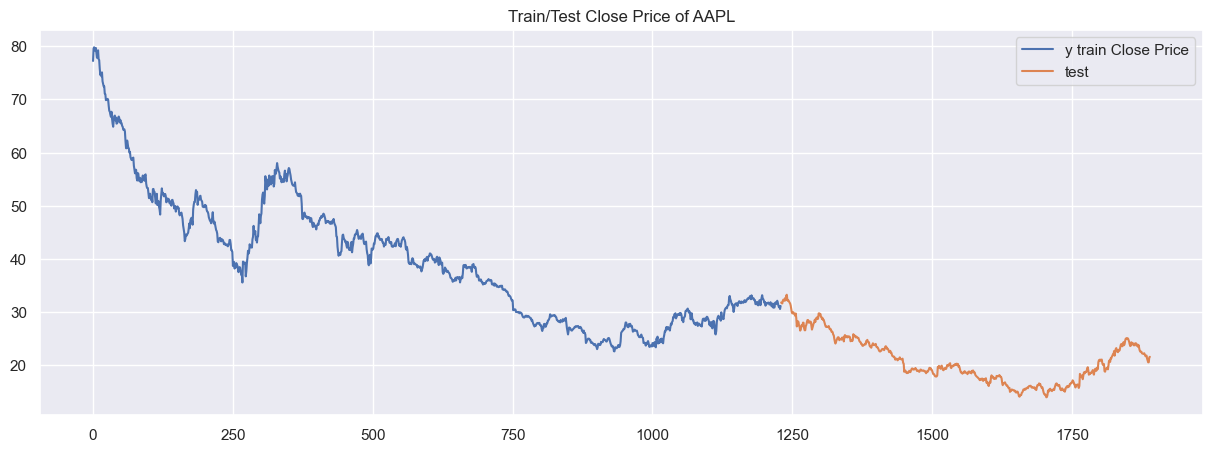

In [67]:
plt.figure(figsize=(15,5))
df_train['Close'].plot(label='y train Close Price')
df_test['Close'].plot(title=f'Train/Test Close Price of {stock_name}', label='test')
plt.legend();

#### Gated Recurrent Unit (GRU) regression model

In [134]:
# Test parameters:
length = [3,11,50 ]
batch = [16,32, 64]
epochs = [50,100, 200]

Train Error score: loss: 0.012392367236316204
Test Error score: acc: 0.0019571171142160892
11/11 [==============================] - 0s 8ms/step
Train Error score: loss: 0.005883024539798498
Test Error score: acc: 0.02109658345580101
Train Error score: loss: 0.02400948479771614
Test Error score: acc: 0.016733231022953987
Train Error score: loss: 0.004645056091248989
Test Error score: acc: 0.005892341025173664
Train Error score: loss: 0.08285362273454666
Test Error score: acc: 0.1499096155166626
Train Error score: loss: 0.002983901184052229
Test Error score: acc: 0.007003373466432095
Train Error score: loss: 0.00855209119617939
Test Error score: acc: 0.001398109714500606
10/10 [==============================] - 1s 67ms/step
Train Error score: loss: 0.0032673466484993696
Test Error score: acc: 0.004604520741850138
Train Error score: loss: 0.020299771800637245
Test Error score: acc: 0.05663565173745155
Best test score : 0.001398109714500606
<IPython.core.display.Image object>


<Figure size 1400x500 with 0 Axes>

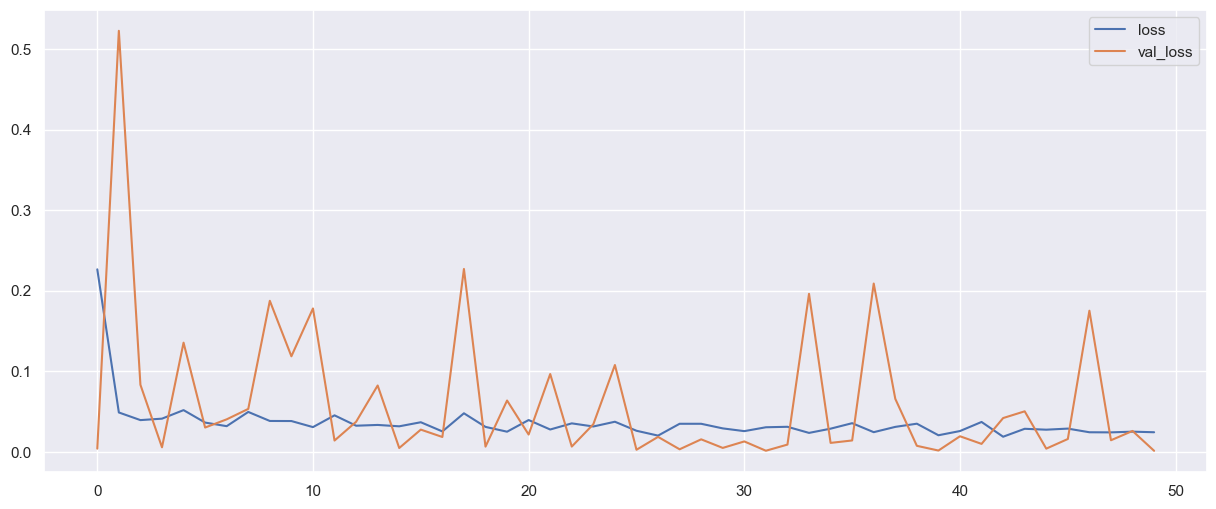

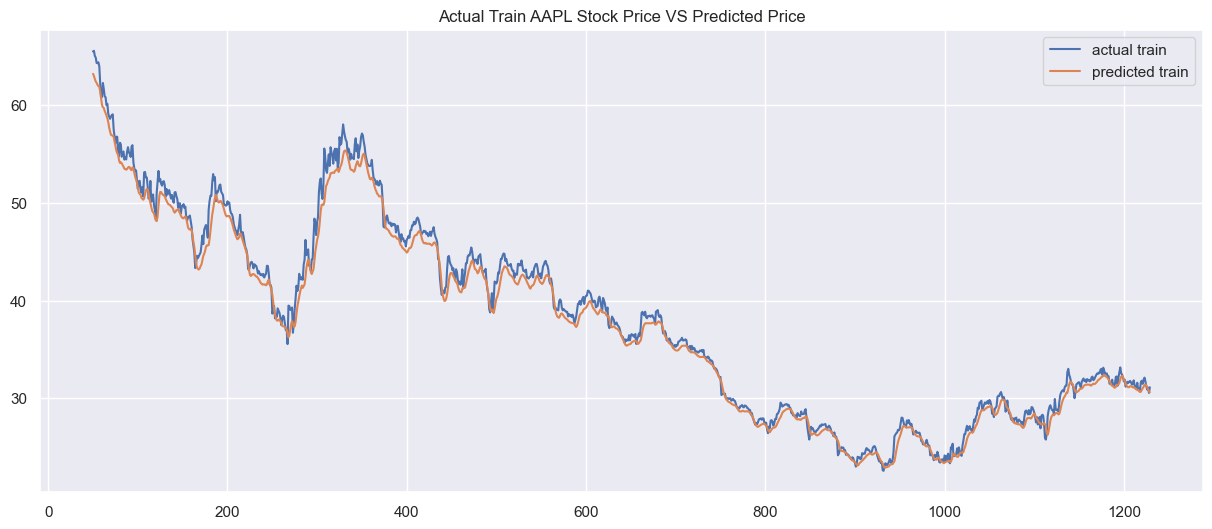

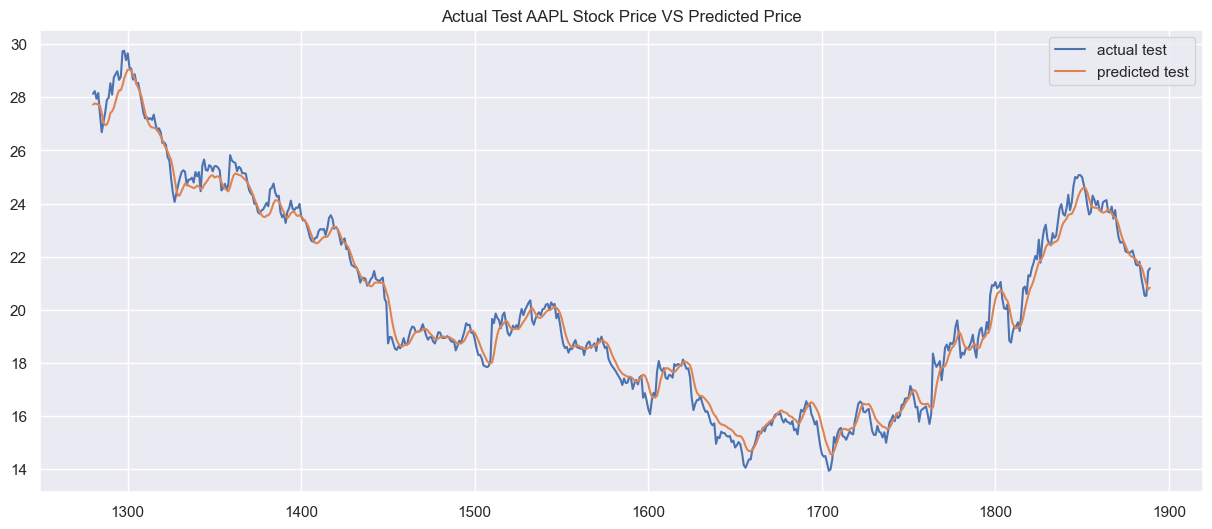

In [88]:
gru_with_close = all_sequential(df_train_stock,df_test_stock, stock_name, type='gru', length=length, batch=batch, epochs=epochs, opt='rmsprop', loss='loss')

In [119]:
gru_with_close['params']

{'tiker': 'AAPL',
 'model': 'gru',
 'opt': 'rmsprop',
 'loss': 0.001398109714500606,
 'length': 50,
 'epochs': 50}

Making predictions any stock prices solely based on sentiment score from daily news can be a difficult task. The mean square error is often high when a GRU model is trained with just the compound sentiment score as the only input feature. This is often used as a baseline when more input features are added to the model in order to improve the accuracy of the prediction.
Let see the below output as example to clarify the how poor the output is.

Train Error score: loss: 0.9680505990982056
Test Error score: acc: 2.4590792655944824
11/11 [==============================] - 0s 5ms/step
Train Error score: loss: 0.9631673097610474
Test Error score: acc: 2.4700562953948975
Train Error score: loss: 0.9535243511199951
Test Error score: acc: 2.3746018409729004
11/11 [==============================] - 0s 5ms/step
Train Error score: loss: 0.890219509601593
Test Error score: acc: 2.225468873977661
11/11 [==============================] - 0s 11ms/step
Train Error score: loss: 0.8571199774742126
Test Error score: acc: 2.503655433654785
Train Error score: loss: 0.7714612483978271
Test Error score: acc: 2.450226068496704
Train Error score: loss: 0.6832054257392883
Test Error score: acc: 2.2764341831207275
Train Error score: loss: 0.6609866619110107
Test Error score: acc: 2.886282205581665
Train Error score: loss: 0.5047370791435242
Test Error score: acc: 2.910010814666748
Best test score : 2.225468873977661
<IPython.core.display.Image object>


<Figure size 1400x500 with 0 Axes>

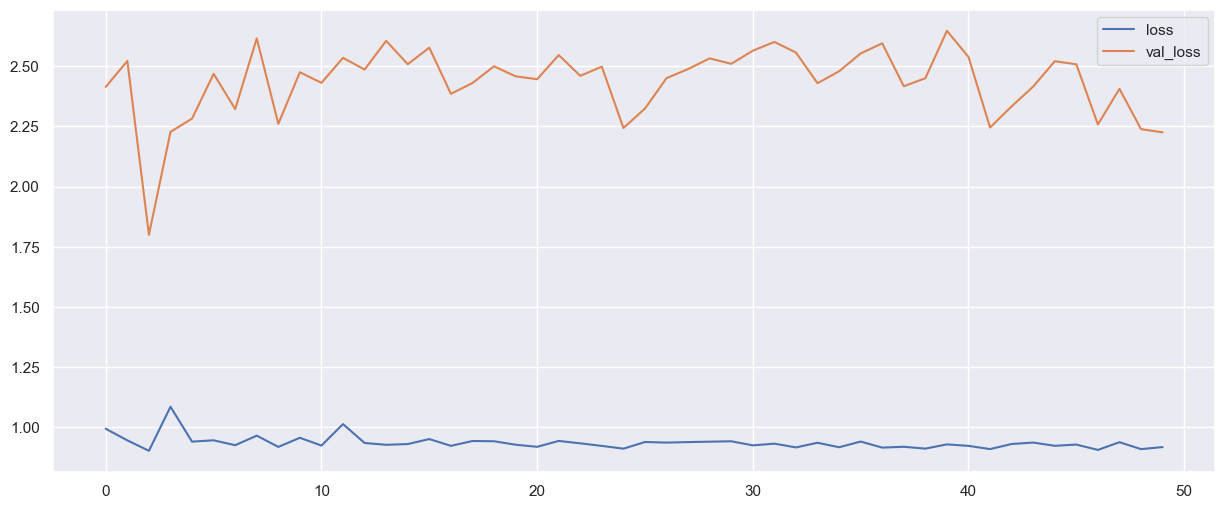

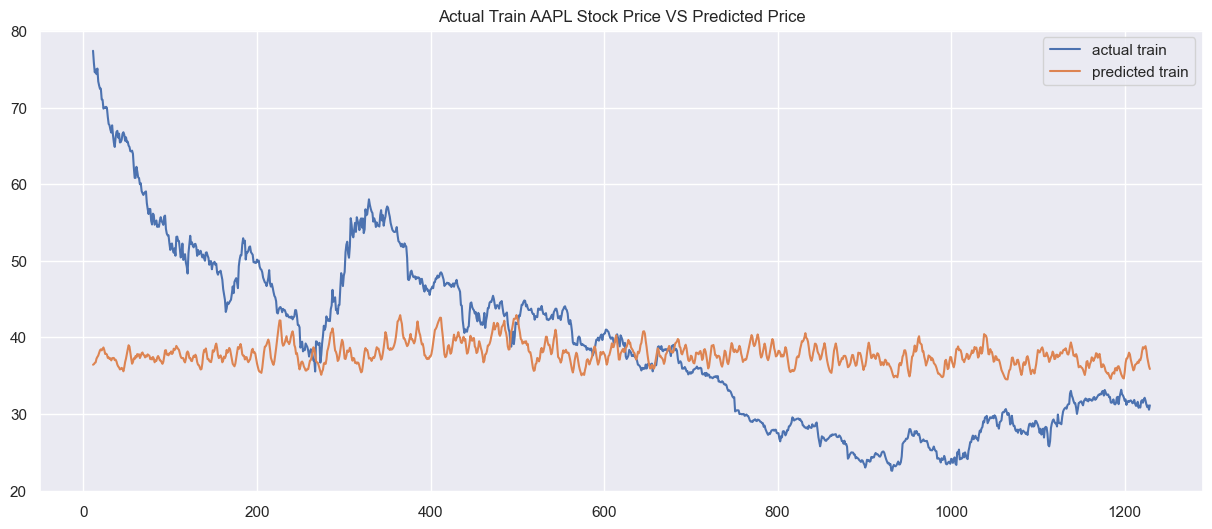

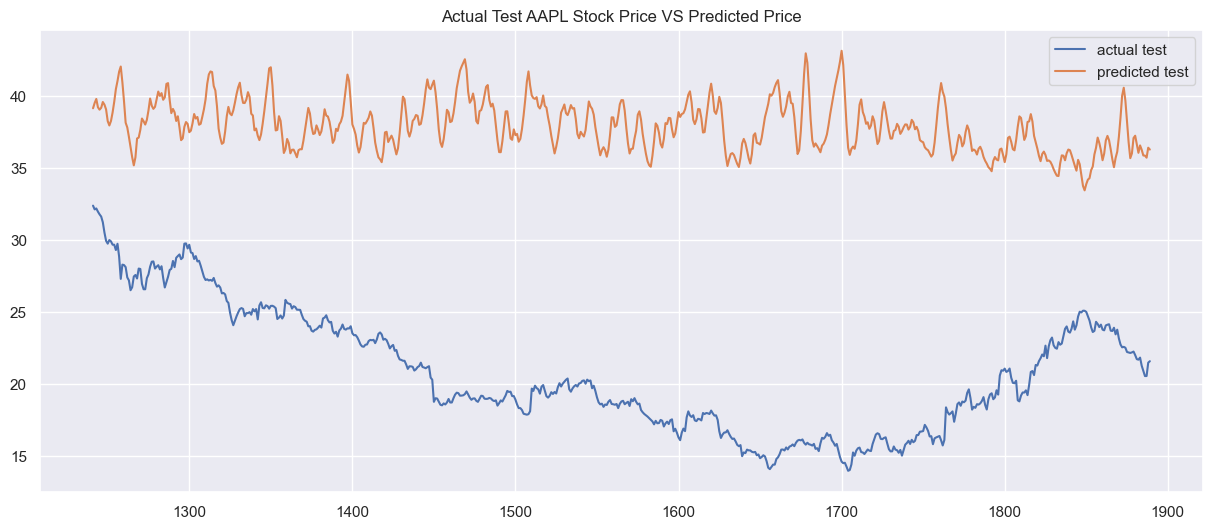

In [69]:
gru_sen = all_sequential(df_train_sent,df_test_sent, stock_name, type='gru', length=length, batch=batch, epochs=epochs, opt='rmsprop', loss='loss')

In [72]:
gru_sen['test_df'].head()

,actual test,predicted test
1241,32.375000,39.141136
1242,32.112499,39.511097
1243,32.180000,39.787495
1244,31.957500,39.212704
1245,31.770000,39.043598


**We can use the above output as a reference and test with more input features for prediction.**

Train Error score: loss: 0.0033867124002426863
Test Error score: acc: 0.005872196052223444
11/11 [==============================] - 0s 4ms/step
Train Error score: loss: 0.013570694252848625
Test Error score: acc: 0.06915389746427536
Train Error score: loss: 0.006525084841996431
Test Error score: acc: 0.0052009462378919125
11/11 [==============================] - 0s 4ms/step
Train Error score: loss: 0.004980253055691719
Test Error score: acc: 0.0015649019042029977
11/11 [==============================] - 0s 10ms/step
Train Error score: loss: 0.004470879212021828
Test Error score: acc: 0.004650363232940435
Train Error score: loss: 0.004029721487313509
Test Error score: acc: 0.007148172706365585
Train Error score: loss: 0.009289368987083435
Test Error score: acc: 0.002152073197066784
Train Error score: loss: 0.004568167962133884
Test Error score: acc: 0.012014059349894524
Train Error score: loss: 0.0071585774421691895
Test Error score: acc: 0.039148807525634766
Best test score : 0.0015649

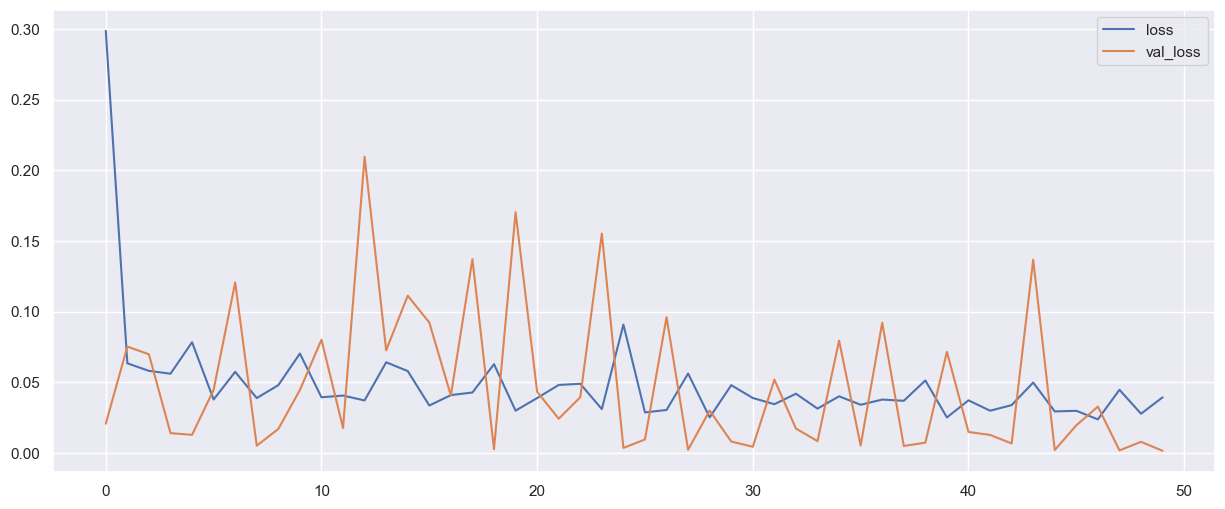

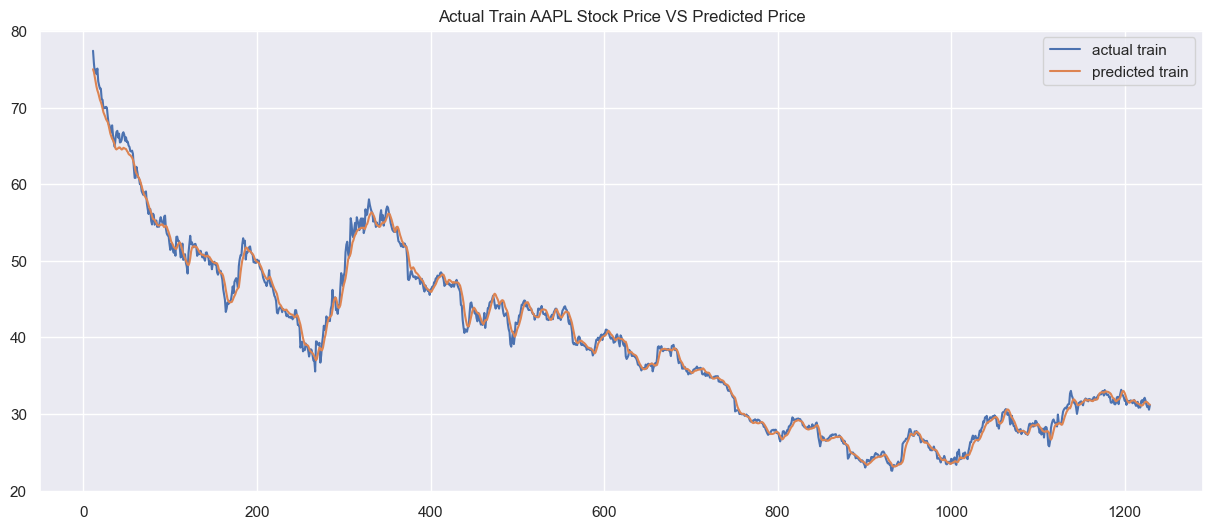

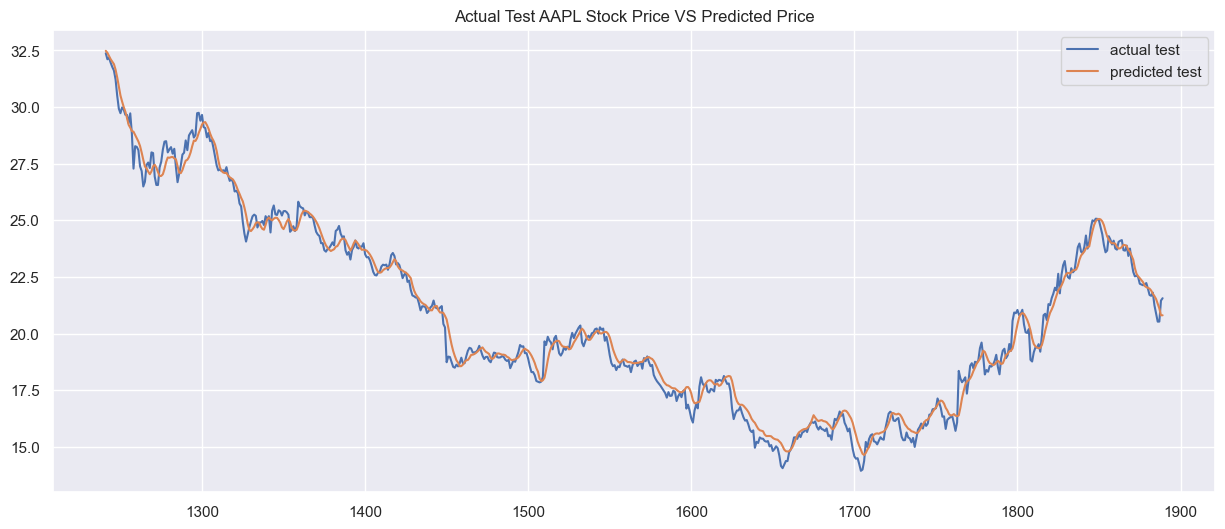

In [46]:
gru_1 = all_sequential(df_train,df_test, stock_name, type='gru', length=length, batch=batch, epochs=epochs, opt='rmsprop', loss='loss')

In [74]:
gru_1['test_df'].head()

,actual test,predicted test
1241,32.375000,32.486126
1242,32.112499,32.396526
1243,32.180000,32.255733
1244,31.957500,32.112583
1245,31.770000,32.006588


Train Error score: loss: 0.008403017185628414
Test Error score: acc: 0.009576098993420601
11/11 [==============================] - 0s 5ms/step
Train Error score: loss: 0.007188510149717331
Test Error score: acc: 0.028378983959555626
Train Error score: loss: 0.005144361872226
Test Error score: acc: 0.0010436245938763022
11/11 [==============================] - 0s 4ms/step
Train Error score: loss: 0.010716533288359642
Test Error score: acc: 0.01213749684393406
Train Error score: loss: 0.019598275423049927
Test Error score: acc: 0.051956839859485626
Train Error score: loss: 0.007383349817246199
Test Error score: acc: 0.0018784173298627138
Train Error score: loss: 0.03628687560558319
Test Error score: acc: 0.040168751031160355
Train Error score: loss: 0.01952916942536831
Test Error score: acc: 0.0009840219281613827
10/10 [==============================] - 0s 33ms/step
Train Error score: loss: 0.0043038371950387955
Test Error score: acc: 0.012606068514287472
Best test score : 0.000984021928

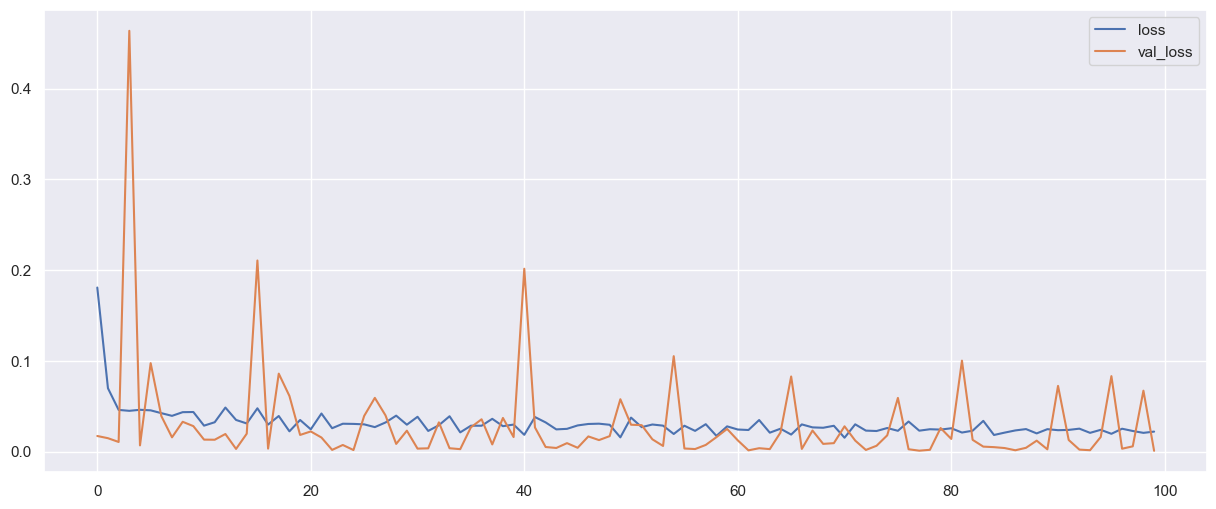

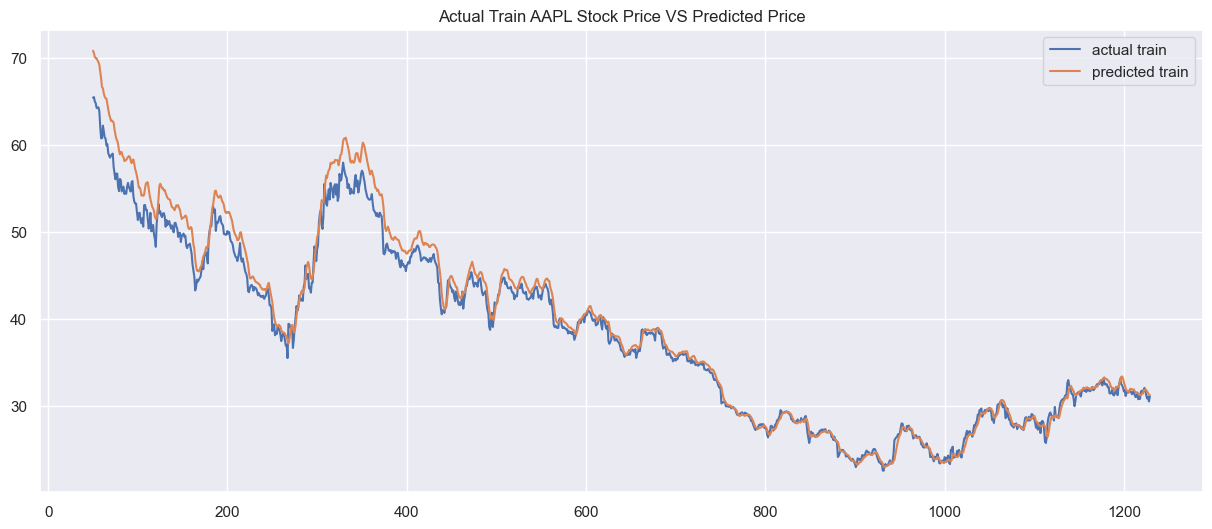

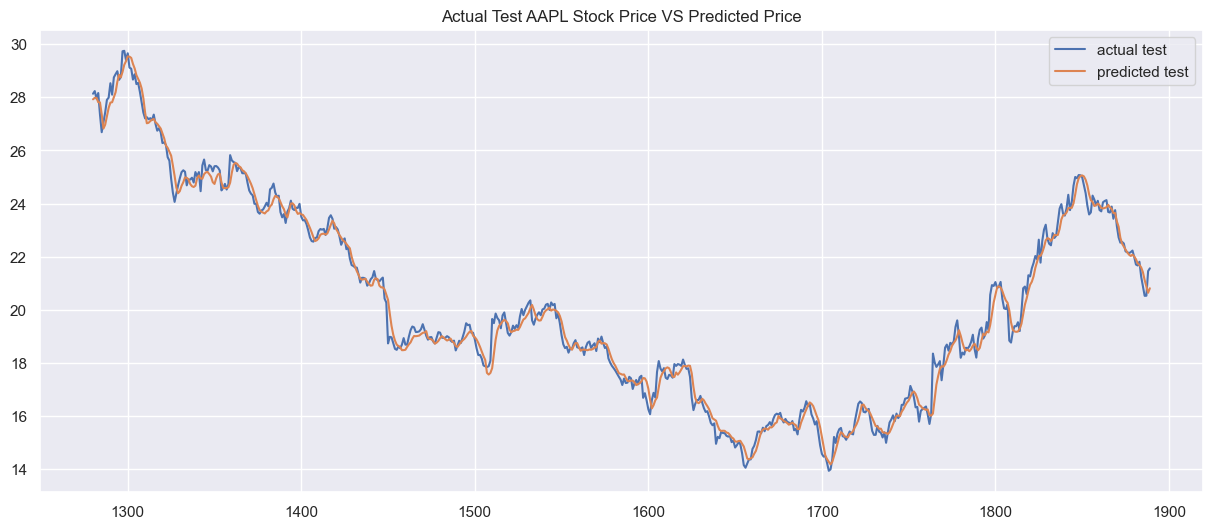

In [47]:
gru = all_sequential(df_train,df_test, stock_name, type='gru', length=length, batch=batch, epochs=epochs, opt='rmsprop', loss='loss')

In [50]:
gru['train_df'].head()

,actual train,predicted train
50,65.489998,70.874809
51,65.550003,70.612976
52,65.035004,70.172897
53,64.857498,70.025093
54,64.309998,70.008682


In [52]:
gru['train_df'].head()

,actual train,predicted train
50,65.489998,70.874809
51,65.550003,70.612976
52,65.035004,70.172897
53,64.857498,70.025093
54,64.309998,70.008682


In [53]:
gru['test_df'].head()

,actual test,predicted test
1280,28.135000,27.924902
1281,28.235001,27.981474
1282,27.945000,27.981422
1283,28.162500,27.815458
1284,27.352501,27.810068


#### Long Short-Term Memory (LSTM) Regression Model

Train Error score: loss: 0.006313977763056755
Test Error score: acc: 0.005312368739396334
11/11 [==============================] - 0s 8ms/step
Train Error score: loss: 0.029037179425358772
Test Error score: acc: 0.08606790006160736
Train Error score: loss: 0.0030292437877506018
Test Error score: acc: 0.00957771297544241
Train Error score: loss: 0.02036929503083229
Test Error score: acc: 0.013182457536458969
Train Error score: loss: 0.006194890011101961
Test Error score: acc: 0.00370423449203372
11/11 [==============================] - 0s 18ms/step
Train Error score: loss: 0.0317319892346859
Test Error score: acc: 0.10949279367923737
Train Error score: loss: 0.005554272327572107
Test Error score: acc: 0.010423670522868633
Train Error score: loss: 0.04360645264387131
Test Error score: acc: 0.059493087232112885
Train Error score: loss: 0.01241716742515564
Test Error score: acc: 0.026213442906737328
Best test score : 0.00370423449203372
<IPython.core.display.Image object>


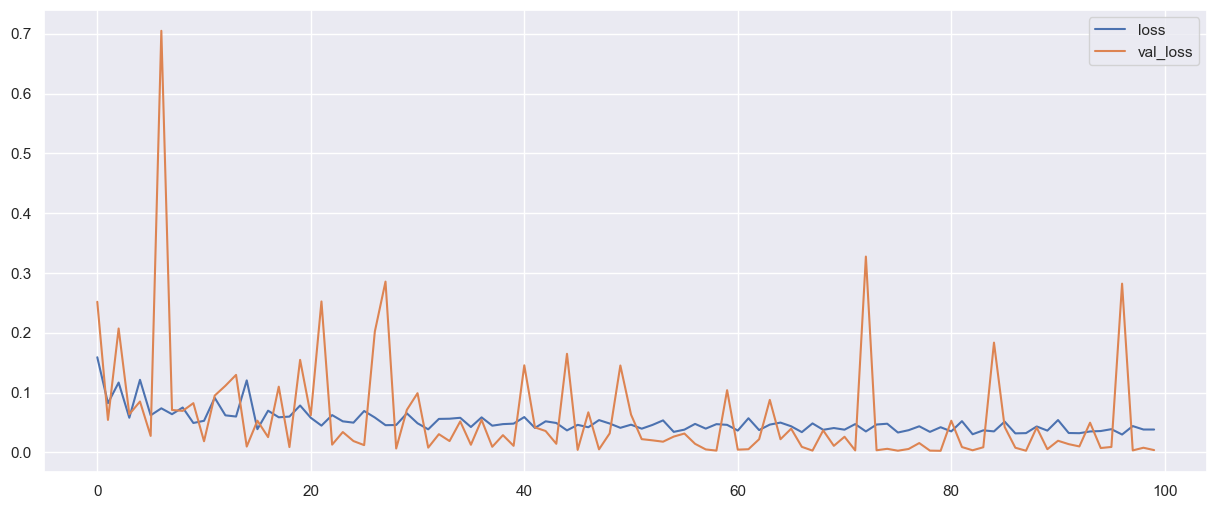

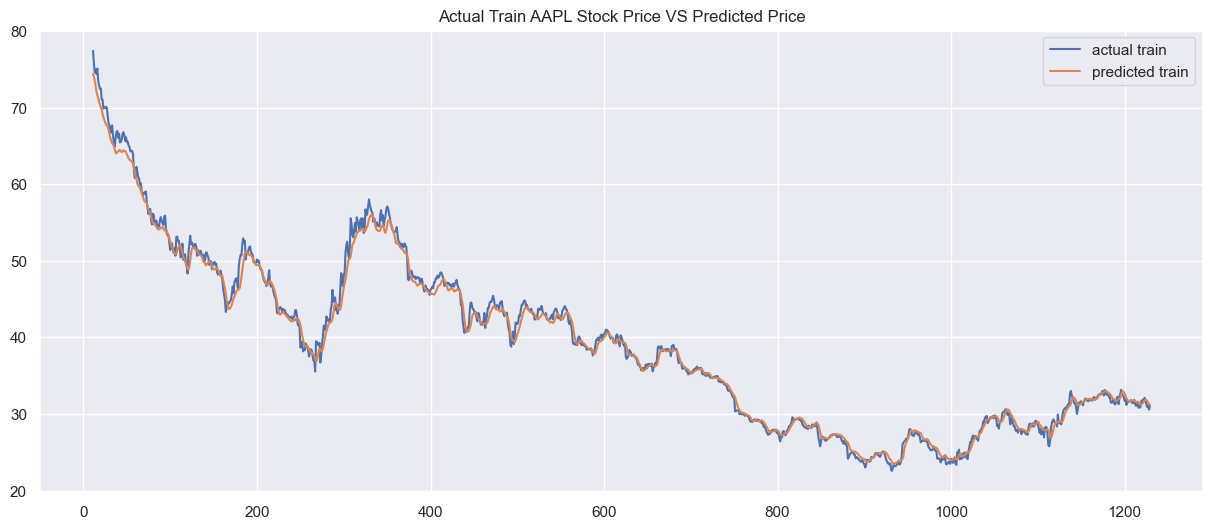

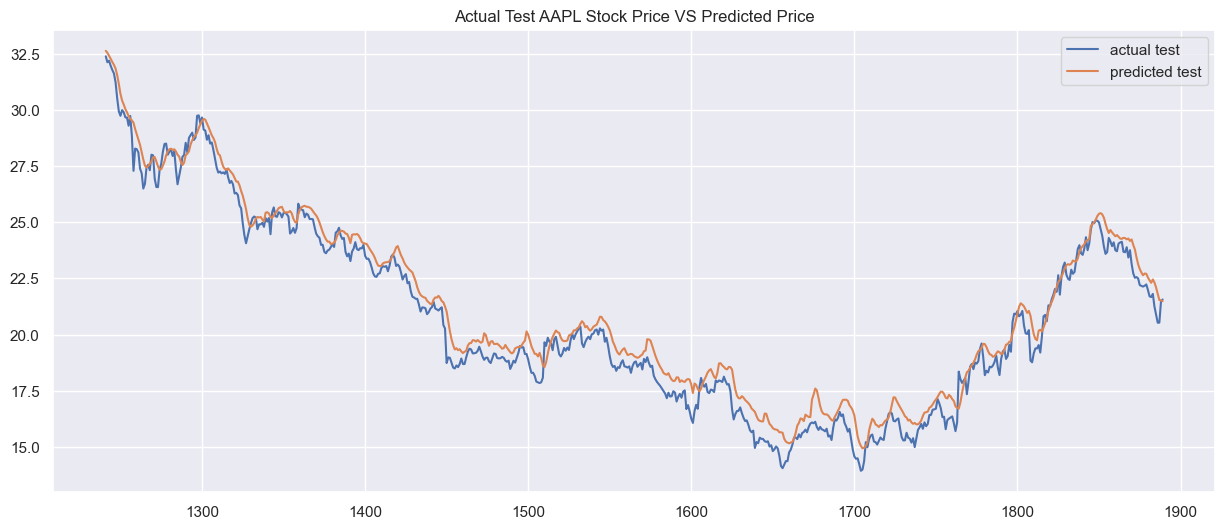

In [54]:
lstm = all_sequential(df_train,df_test, stock_name, type='lstm', length=length, batch=batch, epochs=epochs, opt='rmsprop', loss='loss')

In [77]:
lstm['test_df'].head()

,actual test,predicted test
1241,32.375000,32.621872
1242,32.112499,32.533440
1243,32.180000,32.404701
1244,31.957500,32.267345
1245,31.770000,32.122486


In [55]:
lstm_rmse = np.sqrt(mean_squared_error(lstm['train_df']['predicted train'], lstm['train_df']['actual train']))
lstm_rmse

0.9365473096883193

In [56]:
lstm['train_df'].head()

,actual train,predicted train
11,77.407501,74.401772
12,75.797501,74.071716
13,74.597504,73.434425
14,74.949997,72.829597
15,74.357498,72.073349


In [57]:
gru['test_df'].head()

,actual test,predicted test
1280,28.135000,27.924902
1281,28.235001,27.981474
1282,27.945000,27.981422
1283,28.162500,27.815458
1284,27.352501,27.810068


#### Recursive Neural Network (RNN)

Train Error score: loss: 0.004653462208807468
Test Error score: acc: 0.0013346985215321183
11/11 [==============================] - 0s 2ms/step
Train Error score: loss: 0.0041761500760912895
Test Error score: acc: 0.002240325091406703
Train Error score: loss: 0.0050448342226445675
Test Error score: acc: 0.009662499651312828
Train Error score: loss: 0.0037964347284287214
Test Error score: acc: 0.0024159771855920553
Train Error score: loss: 0.0035983955021947622
Test Error score: acc: 0.008211798034608364
Train Error score: loss: 0.0025284297298640013
Test Error score: acc: 0.0008980367565527558
11/11 [==============================] - 0s 4ms/step
Train Error score: loss: 0.02593664638698101
Test Error score: acc: 0.04470309615135193
Train Error score: loss: 0.012614570558071136
Test Error score: acc: 0.05843011289834976
Train Error score: loss: 0.02899150922894478
Test Error score: acc: 0.07727371901273727
Best test score : 0.0008980367565527558
<IPython.core.display.Image object>


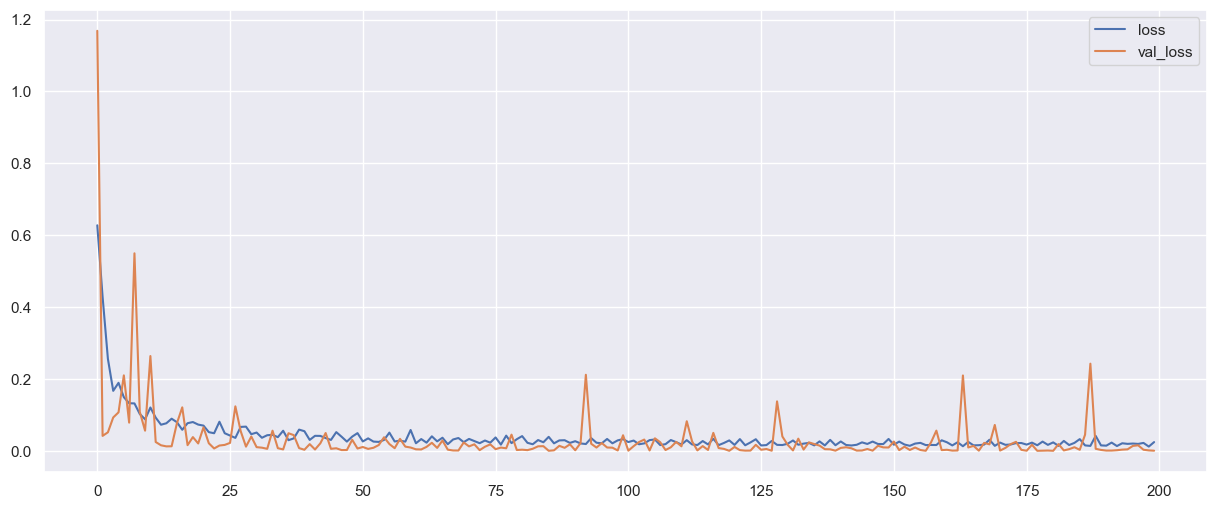

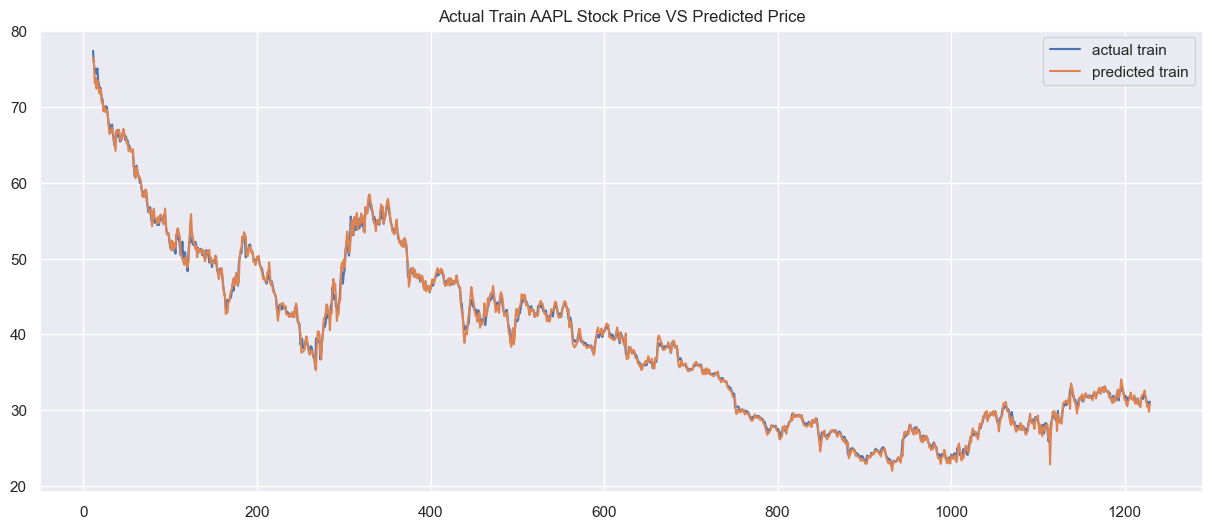

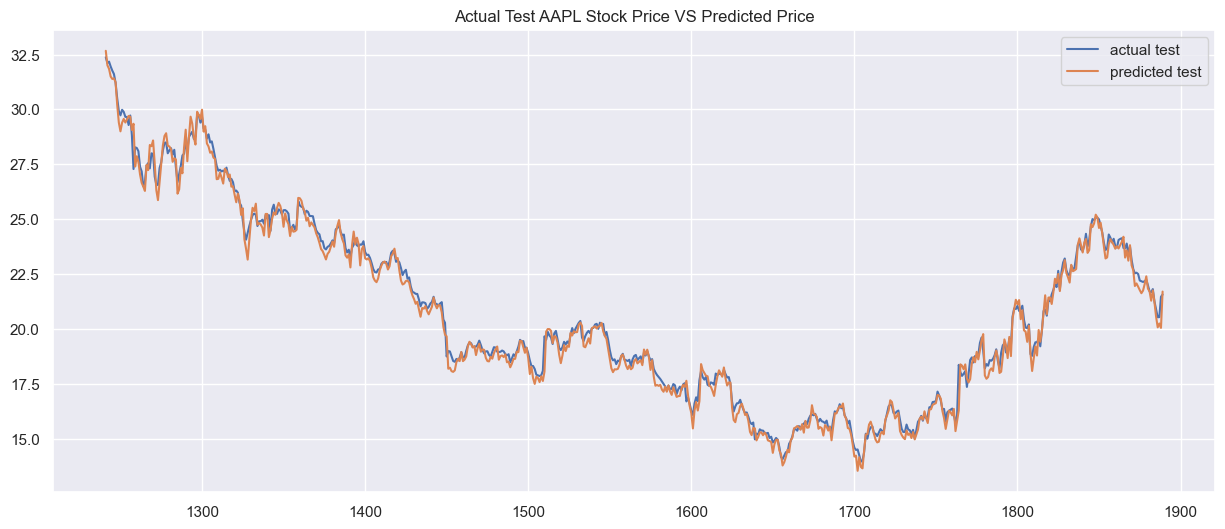

In [58]:
rnn = all_sequential(df_train, df_test, stock_name, type='rnn', length=length, batch=batch, epochs=epochs, opt='rmsprop', loss='loss')

In [113]:
# Best output compare to the others.
rnn['params']

{'tiker': 'AAPL',
 'model': 'rnn',
 'opt': 'rmsprop',
 'loss': 0.0008980367565527558,
 'length': 11,
 'epochs': 200}

In [60]:
rnn['train_df'].head()

,actual train,predicted train
11,77.407501,76.492790
12,75.797501,75.772209
13,74.597504,73.131195
14,74.949997,73.854843
15,74.357498,72.422539


In [61]:
rnn['test_df'].head()

,actual test,predicted test
1241,32.375000,32.673462
1242,32.112499,32.013344
1243,32.180000,31.848591
1244,31.957500,31.500799
1245,31.770000,31.388994


Train Error score: loss: 0.0022459072060883045
Test Error score: acc: 0.0008744860533624887
11/11 [==============================] - 0s 3ms/step
Train Error score: loss: 0.0018584660720080137
Test Error score: acc: 0.0015596103621646762
Train Error score: loss: 0.00349880731664598
Test Error score: acc: 0.004874304868280888
Train Error score: loss: 0.0032645100727677345
Test Error score: acc: 0.0025695147924125195
Train Error score: loss: 0.008819730021059513
Test Error score: acc: 0.013488865457475185
Train Error score: loss: 0.0029865074902772903
Test Error score: acc: 0.0027579735033214092
Train Error score: loss: 0.01001675147563219
Test Error score: acc: 0.006678254343569279
Train Error score: loss: 0.005982700735330582
Test Error score: acc: 0.041980061680078506
Train Error score: loss: 0.004315620753914118
Test Error score: acc: 0.02357405610382557
Best test score : 0.0008744860533624887
<IPython.core.display.Image object>


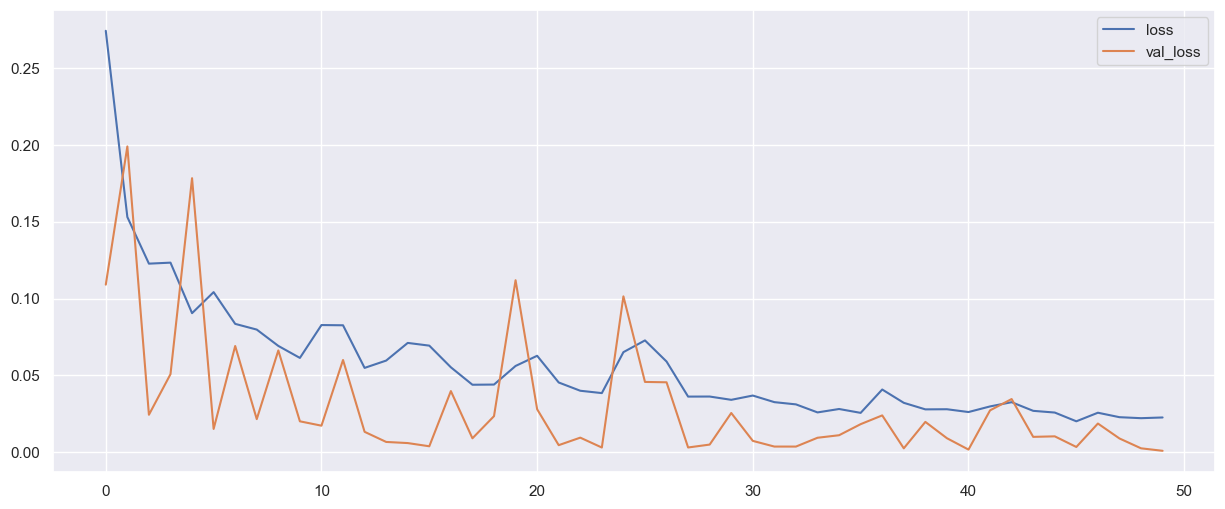

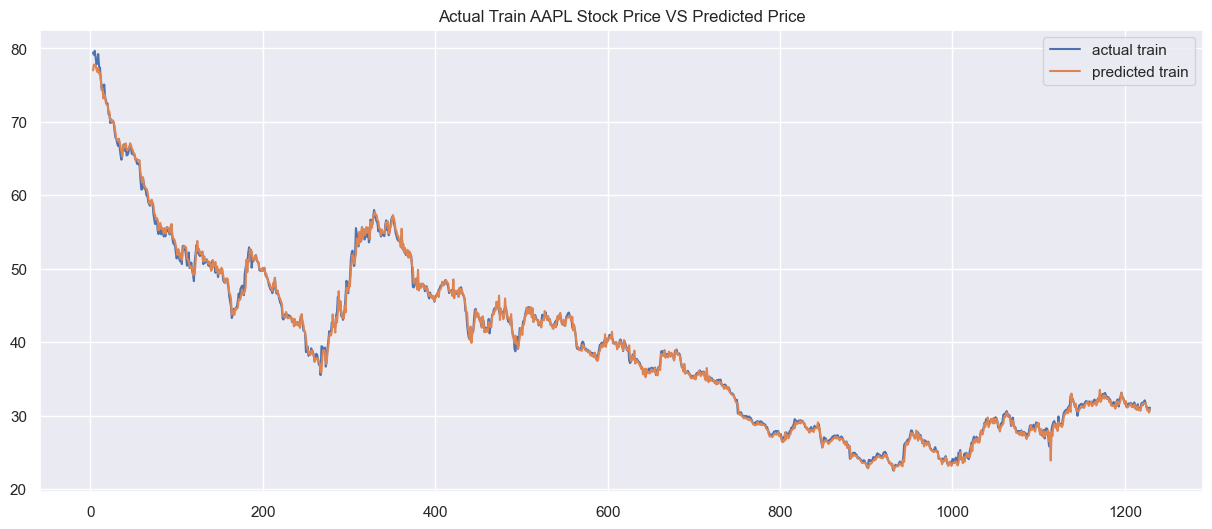

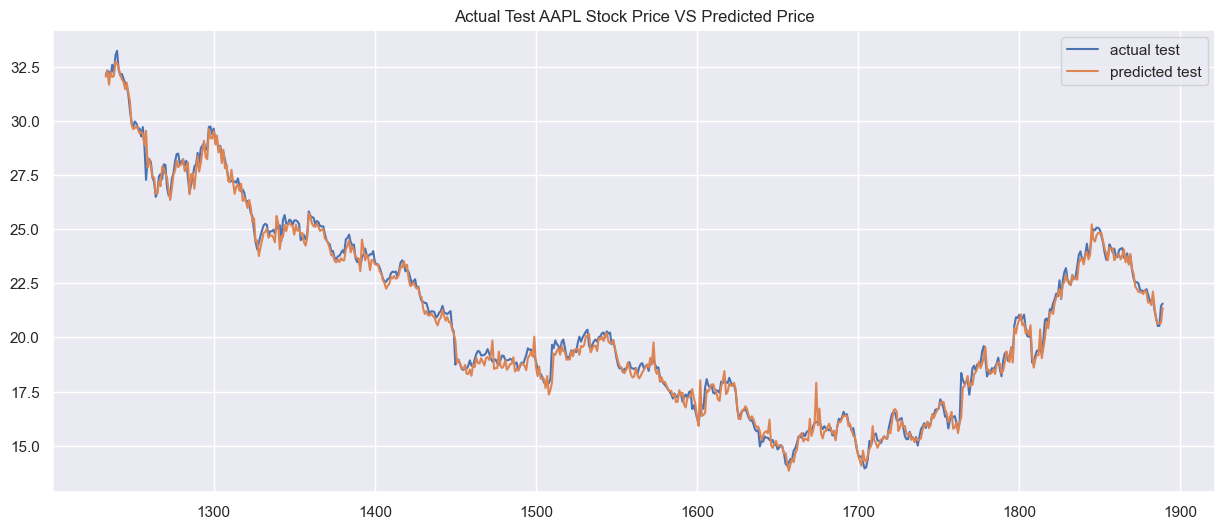

In [62]:
rnn_adam = all_sequential(df_train, df_test, stock_name, type='rnn', length=length, batch=batch, epochs=epochs, opt='adam', loss='loss')

In [118]:
rnn_adam['params']

{'tiker': 'AAPL',
 'model': 'rnn',
 'opt': 'adam',
 'loss': 0.0008744860533624887,
 'length': 3,
 'epochs': 50}

In [65]:
rnn_adam['train_df'].head()

,actual train,predicted train
3,79.425003,77.026909
4,79.142502,77.802757
5,79.682503,77.726181
6,78.809998,77.696426
7,77.834999,77.131454


In [66]:
rnn_adam['test_df'].head()

,actual test,predicted test
1233,32.134998,32.050903
1234,32.340000,32.329674
1235,32.272499,31.681116
1236,32.115002,32.260738
1237,32.605000,32.038532


#### Reference

https://www.tandfonline.com/doi/full/10.1080/08839514.2022.2151159

https://www.diva-portal.org/smash/get/diva2:1584099/FULLTEXT01.pdf

https://www.blueskycapitalmanagement.com/machine-learning-in-finance-why-you-should-not-use-lstms-to-predict-the-stock-market/